# Hailey Weinschenk - Dashboard Creation and Logic

In [1]:
import pandas as pd

# for px graph compatibility
import plotly.io as pio
pio.renderers.default='notebook'

The following datasets were procured in two ways for the year of 2022:
- the former displays all contracts broken down by state. In addition, the quantifiers of the relevant North American Industry Classification System (NAICS) codes, vendor business type, as well as the total dollar amount of each contract are included. This was obtained through a custom search on [sam.gov ad hoc data bank](https://sam.gov/reports/awards/adhoc).
- the latter concerns the eligibility of each NAICS for Woman Owned Small Business (WOSB) and/or Economically Disadvantaged Woman Owned Small Business (EDWOSB) Federal Contracting Program. This is hosted by the Small Business Administration [here](https://www.sba.gov/document/support-eligible-naics-women-owned-small-business-federal-contracting-program).

To begin the preprocessing for dashboard creation, the data is read into DataFrames.

In [2]:
# read into pandas dataframe
contract_df = pd.read_csv('Report Builder.csv')
naics_df = pd.read_csv('wosb_naics_2022.csv')

In [3]:
# and view
contract_df.head(10)

Report Builder
Principal Place of Performance State Code Is Vendor Business Type - Economically Disadvan... Is Vendor Business Type - Women Owned Small Bus... NAICS Code NAICS Description                                   Base and All Options Value (Total Contract Value)
AK                                        NO                                                 NO                                                 112519     OTHER AQUACULTURE (2007), OTHER ANIMAL AQUACULT...                                         $15,899.80
                                                                                                                                                114119     OTHER MARINE FISHING                                                                       $15,630.21
                                                                                                                                                115310     SUPPORT ACTIVITIES FOR FORESTRY                                                         $1,218,689.41
                                                                                                                                                212112     BITUMINOUS COAL UNDERGROUND MINING                                                     $34,976,520.00
                                                                                                                                                212319     OTHER CRUSHED AND BROKEN STONE MINING AND QUARR...                                      $1,106,156.20
                                                                                                                                                212321     CONSTRUCTION SAND AND GRAVEL MINING                                                       $448,563.00
                                                                                                                                                213112     SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS                                          $55,060,711.00
                                                                                                                                                221112     FOSSIL FUEL ELECTRIC POWER GENERATION                                                 $294,288,986.32
                                                                                                                                                221114     SOLAR ELECTRIC POWER GENERATION                                                           $578,000.00

There is a problem with the column hierarchy. The .csv file was incorrectly read, as the indexing needs to be adjusted. This can simply be done by declaring the `header` parameter as the first row when reading in using `pd.read_csv()`.

In [4]:
contract_df = pd.read_csv('Report Builder.csv', header = 1)

In [5]:
contract_df.head()

,Principal Place of Performance State Code,Is Vendor Business Type - Economically Disadvantaged Women Owned Small Business,Is Vendor Business Type - Women Owned Small Business,NAICS Code,NAICS Description,Base and All Options Value (Total Contract Value)
0,AK,NO,NO,112519,"OTHER AQUACULTURE (2007), OTHER ANIMAL AQUACUL...","$15,899.80"
1,AK,NO,NO,114119,OTHER MARINE FISHING,"$15,630.21"
2,AK,NO,NO,115310,SUPPORT ACTIVITIES FOR FORESTRY,"$1,218,689.41"
3,AK,NO,NO,212112,BITUMINOUS COAL UNDERGROUND MINING,"$34,976,520.00"
4,AK,NO,NO,212319,OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,"$1,106,156.20"


Now, the data looks correct. It can be discerned that each entry of this table is equivalent to one contract, each containing the aforementioned info. Even though it passes the eye test, there is multiple problems that appear when viewing column

In [6]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36957 entries, 0 to 36956
Data columns (total 6 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Principal Place of Performance State Code                                        36957 non-null  object
 1   Is Vendor Business Type - Economically Disadvantaged Women Owned Small Business  36957 non-null  object
 2   Is Vendor Business Type - Women Owned Small Business                             36957 non-null  object
 3   NAICS Code                                                                       36957 non-null  int64 
 4   NAICS Description                                                                36957 non-null  object
 5   Base and All Options Value (Total Contract Value)                                36957 non-null  object
dtypes: int64(1), ob

`NAICS Code` is numeric, but just a label representing an industry. Therefore, this should be converted to a string (object). Similarly, the dollar amounts for the `Base and All Options Value (Total Contract Value)` column should be converted into `double`.         

In [7]:
# code to string
contract_df['NAICS Code'] = contract_df['NAICS Code'].astype('object')

# currency to float
# get rid of $ and ,
contract_df["Base and All Options Value (Total Contract Value)"]= contract_df["Base and All Options Value (Total Contract Value)"].str.replace('$','')
contract_df["Base and All Options Value (Total Contract Value)"]= contract_df["Base and All Options Value (Total Contract Value)"].str.replace(',','')

# to float
contract_df["Base and All Options Value (Total Contract Value)"] = contract_df['Base and All Options Value (Total Contract Value)'].astype('float64')

/var/folders/7t/p8sb13rj56vgpg9wvfj5ph5c0000gn/T/ipykernel_71550/1331884965.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [8]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36957 entries, 0 to 36956
Data columns (total 6 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Principal Place of Performance State Code                                        36957 non-null  object 
 1   Is Vendor Business Type - Economically Disadvantaged Women Owned Small Business  36957 non-null  object 
 2   Is Vendor Business Type - Women Owned Small Business                             36957 non-null  object 
 3   NAICS Code                                                                       36957 non-null  object 
 4   NAICS Description                                                                36957 non-null  object 
 5   Base and All Options Value (Total Contract Value)                                36957 non-null  float64
dtypes: floa

In [9]:
# view other table
naics_df.head()

,NAICS,Description of NAICS,Set-Aside
0,111110,Soybean Farming,WOSB
1,111120,Oilseed (except Soybean) Farming,WOSB
2,111130,Dry Pea and Bean Farming,WOSB
3,111140,Wheat Farming,WOSB
4,111150,Corn Farming,WOSB


This simple table defines the NAICS for which these set-aside contracts exist for WOSB and EDWOSB.

In [10]:
naics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NAICS                 759 non-null    int64 
 1   Description of NAICS  759 non-null    object
 2   Set-Aside             759 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.9+ KB


There needs to be a similar change for the `NAICS` field which is functionally equivalent to the `NAICS Code` field above.

In [11]:
# code to string
naics_df['NAICS'] = naics_df['NAICS'].astype('object')

By involving this table, we can observe the differential of businesses fulfilling contracts who are eligible for the WOBS or EDWOBS programs, who haven't registered. This can be done by preserving the original `Is Vendor Business Type` columns. This will be done later as the third graph.

To do this, the data will be left joined on the NAICS code. This matches every NACIS id's for every contract in the left table, while indicating the (ED)WOSB or Non-WOSB status of the NAICS.

In [12]:
df = pd.merge(left = contract_df, right = naics_df, how = 'left', left_on = 'NAICS Code', right_on = 'NAICS')

In [13]:
df.head()

,Principal Place of Performance State Code,Is Vendor Business Type - Economically Disadvantaged Women Owned Small Business,Is Vendor Business Type - Women Owned Small Business,NAICS Code,NAICS Description,Base and All Options Value (Total Contract Value),NAICS,Description of NAICS,Set-Aside
0,AK,NO,NO,112519,"OTHER AQUACULTURE (2007), OTHER ANIMAL AQUACUL...",15899.80,NaN,NaN,NaN
1,AK,NO,NO,114119,OTHER MARINE FISHING,15630.21,NaN,NaN,NaN
2,AK,NO,NO,115310,SUPPORT ACTIVITIES FOR FORESTRY,1218689.41,115310,Support Activities for Forestry,EDWOSB
3,AK,NO,NO,212112,BITUMINOUS COAL UNDERGROUND MINING,34976520.00,NaN,NaN,NaN
4,AK,NO,NO,212319,OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,1106156.20,212319,Other Crushed and Broken Stone Mining and Quar...,EDWOSB


In [14]:
# group for each state, and add sum of numerical values (contract value) 
per_state = df.groupby(['Principal Place of Performance State Code','Is Vendor Business Type - Women Owned Small Business']).sum()
per_state.head()

Base and All Options Value (Total Contract Value)
Principal Place of Performance State Code Is Vendor Business Type - Women Owned Small Bus...                                                   
AK                                        NO                                                                                       7.670099e+09
                                          YES                                                                                      1.052060e+08
AL                                        NO                                                                                       2.707434e+10
                                          YES                                                                                      7.436778e+08
AR                                        NO                                                                                       1.011262e+09

In [15]:
# reset to obtain values from index hierarchy
per_state.reset_index(inplace = True)

In [16]:
per_state.head(10)

,Principal Place of Performance State Code,Is Vendor Business Type - Women Owned Small Business,Base and All Options Value (Total Contract Value)
0,AK,NO,7.670099e+09
1,AK,YES,1.052060e+08
2,AL,NO,2.707434e+10
3,AL,YES,7.436778e+08
4,AR,NO,1.011262e+09
5,AR,YES,8.605145e+07
6,AS,NO,8.416502e+05
7,AS,YES,6.348615e+04
8,AZ,NO,5.036865e+10
9,AZ,YES,2.148350e+08


In [17]:
# round to millions for more reader comprehension
per_state['Base and All Options Value (Total Contract Value)'] = round(per_state['Base and All Options Value (Total Contract Value)']/1000000,2)

In [18]:
per_state.head()

,Principal Place of Performance State Code,Is Vendor Business Type - Women Owned Small Business,Base and All Options Value (Total Contract Value)
0,AK,NO,7670.10
1,AK,YES,105.21
2,AL,NO,27074.34
3,AL,YES,743.68
4,AR,NO,1011.26


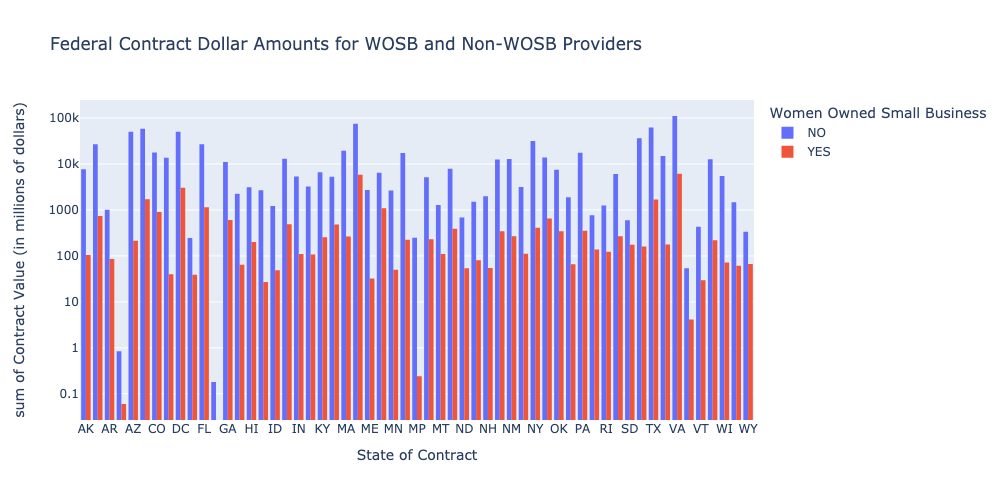

In [19]:
# create double bar graph and save this graph for the dashboard
import plotly.express as px

fig1 = px.histogram(per_state, x="Principal Place of Performance State Code", y="Base and All Options Value (Total Contract Value)",
             color='Is Vendor Business Type - Women Owned Small Business', barmode='group',labels={
                     "Principal Place of Performance State Code": "State of Contract",
                     "Base and All Options Value (Total Contract Value)": "Contract Value (in millions of dollars)",
                     "Is Vendor Business Type - Women Owned Small Business": "Women Owned Small Business"
                 },
                title="Federal Contract Dollar Amounts for WOSB and Non-WOSB Providers", width = 1000,log_y = True)
fig1.show('png')

In [20]:
import numpy as np

# obtain the total value of contracts for each state
total  = per_state.groupby('Principal Place of Performance State Code').sum()
partial = per_state['Base and All Options Value (Total Contract Value)']

# duplicate each row
total= pd.Series(np.repeat(total.values,2))

# and add a new column representing the % of total contract money awarded for WOSB and non-WOSB contractors.
per_state['Statewide Percentage of Total Contracted Dollars'] = round(partial/total,4)*100

In [21]:
# obtain highest ratio of WOSB to non WOSB dollars per state
highest_percentage_wosb = per_state.groupby('Principal Place of Performance State Code').min('Statewide Percentage of Total Contracted Dollars')\
['Statewide Percentage of Total Contracted Dollars'].sort_values(ascending = False).iloc[:11]

highest_percentage_wosb

Principal Place of Performance State Code
FM    100.00
WY     16.55
MI     14.40
DE     13.62
SD      9.46
RI      8.90
LA      8.35
MT      7.90
AR      7.84
ND      7.31
MD      7.20
Name: Statewide Percentage of Total Contracted Dollars, dtype: float64

FM is Federated States of Micronesia in US code; this outlier can be disregarded. We are left with the 10 highest percentages of WOSB contract dollars. 

In [22]:
highest_percentage_wosb = highest_percentage_wosb[1:]

highest_percentage_wosb

Principal Place of Performance State Code
WY    16.55
MI    14.40
DE    13.62
SD     9.46
RI     8.90
LA     8.35
MT     7.90
AR     7.84
ND     7.31
MD     7.20
Name: Statewide Percentage of Total Contracted Dollars, dtype: float64

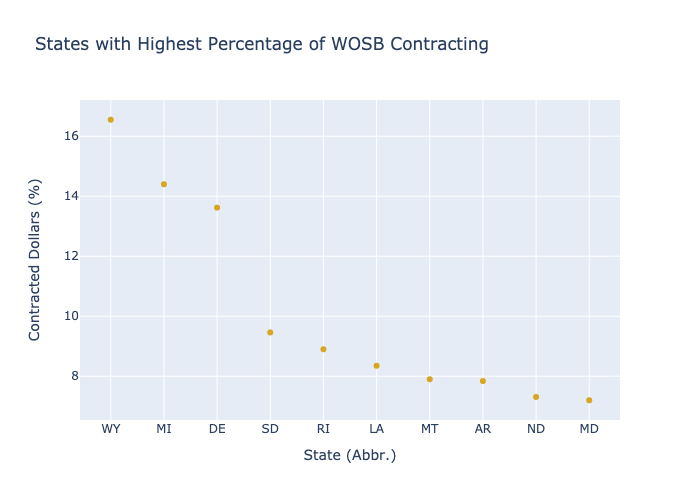

In [23]:
# plot on a line graph for the dashboard
fig2 = px.scatter(highest_percentage_wosb, x=highest_percentage_wosb.index, y="Statewide Percentage of Total Contracted Dollars", \
              title='States with Highest Percentage of WOSB Contracting',\
              labels = {"Principal Place of Performance State Code":"State (Abbr.)","Statewide Percentage of Total Contracted Dollars":"Contracted Dollars (%)"}, color_discrete_sequence=['goldenrod'])
fig2.show("png")

Next, the percentage of WSOB contracts will be explored for each eligible NAICS. This will highlight the industries eligible for WSOB or EDWSOB program contracts that are not being granted in practice. Policy adjustments could be recommended to raise these ratios.

In [24]:
# review original df
df.head()

,Principal Place of Performance State Code,Is Vendor Business Type - Economically Disadvantaged Women Owned Small Business,Is Vendor Business Type - Women Owned Small Business,NAICS Code,NAICS Description,Base and All Options Value (Total Contract Value),NAICS,Description of NAICS,Set-Aside
0,AK,NO,NO,112519,"OTHER AQUACULTURE (2007), OTHER ANIMAL AQUACUL...",15899.80,NaN,NaN,NaN
1,AK,NO,NO,114119,OTHER MARINE FISHING,15630.21,NaN,NaN,NaN
2,AK,NO,NO,115310,SUPPORT ACTIVITIES FOR FORESTRY,1218689.41,115310,Support Activities for Forestry,EDWOSB
3,AK,NO,NO,212112,BITUMINOUS COAL UNDERGROUND MINING,34976520.00,NaN,NaN,NaN
4,AK,NO,NO,212319,OTHER CRUSHED AND BROKEN STONE MINING AND QUAR...,1106156.20,212319,Other Crushed and Broken Stone Mining and Quar...,EDWOSB


In [25]:
# preserve original
naics_wise_df = df.copy()

#only concerned with WOSB NAICS's (drop non WOSB NAICS contracts)
naics_wise_df.dropna(inplace = True)

# group by the industry, whether the industry is WOSB set-aside, and whether the contractor is WOSB
naics_explorer_df = naics_wise_df.groupby(['NAICS','Description of NAICS','Set-Aside','Is Vendor Business Type - Women Owned Small Business']).agg('sum')
naics_explorer_df.head(15)

Base and All Options Value (Total Contract Value)
NAICS  Description of NAICS               Set-Aside Is Vendor Business Type - Women Owned Small Bus...                                                   
111110 Soybean Farming                    WOSB      NO                                                                                          466323.61
111120 Oilseed (except Soybean) Farming   WOSB      NO                                                                                          471797.00
111130 Dry Pea and Bean Farming           WOSB      NO                                                                                           24978.87
111140 Wheat Farming                      WOSB      NO                                                                                           13070.34
111150 Corn Farming                       WOSB      NO                                                                                          774924.09
111199 All Other Grain Farming            WOSB      NO                                                                                          148360.00
111419 Other Food Crops Grown Under Cover EDWOSB    NO                                                                                           54490.00
111421 Nursery and Tree Production        EDWOSB    NO                                                                                         2381513.55
                                                    YES                                                                                         282861.00
111422 Floriculture Production            EDWOSB    NO                                                                                          180982.07
111920 Cotton Farming                     WOSB      NO                                                                                           14516.99
111940 Hay Farming                        WOSB      NO                                                                                         4349506.35
                                                    YES                                                                                        2735650.80
111991 Sugar Beet Farming                 WOSB      NO                                                                                           20829.20
                                                    YES                                                                                          14160.00

In [26]:
# again round to millions for more reader comprehension
naics_explorer_df['Base and All Options Value (Total Contract Value)'] = round(naics_explorer_df['Base and All Options Value (Total Contract Value)']/1000000,4)

In [27]:
# now contract value unit is in millions of dollars. WOSB with YES and NO have 
naics_explorer_df.head(50)

Base and All Options Value (Total Contract Value)
NAICS  Description of NAICS                              Set-Aside Is Vendor Business Type - Women Owned Small Bus...                                                   
111110 Soybean Farming                                   WOSB      NO                                                                                             0.4663
111120 Oilseed (except Soybean) Farming                  WOSB      NO                                                                                             0.4718
111130 Dry Pea and Bean Farming                          WOSB      NO                                                                                             0.0250
111140 Wheat Farming                                     WOSB      NO                                                                                             0.0131
111150 Corn Farming                                      WOSB      NO                                                                                             0.7749
111199 All Other Grain Farming                           WOSB      NO                                                                                             0.1484
111419 Other Food Crops Grown Under Cover                EDWOSB    NO                                                                                             0.0545
111421 Nursery and Tree Production                       EDWOSB    NO                                                                                             2.3815
                                                                   YES                                                                                            0.2829
111422 Floriculture Production                           EDWOSB    NO                                                                                             0.1810
111920 Cotton Farming                                    WOSB      NO                                                                                             0.0145
111940 Hay Farming                                       WOSB      NO                                                                                             4.3495
                                                                   YES                                                                                            2.7357
111991 Sugar Beet Farming                                WOSB      NO                                                                                             0.0208
                                                                   YES                                                                                            0.0142
111998 All Other Miscellaneous Crop Farming              WOSB      NO                                                                                             3.6859
112210 Hog and Pig Farming                               WOSB      NO                                                                                             0.4741
                                                                   YES                                                                                            0.0200
112310 Chicken Egg Production                            EDWOSB    NO                                                                                             1.0947
                                                                   YES                                                                                            0.1039
112320 Broilers and Other Meat Type Chicken Production   EDWOSB    NO                                                                                             0.0425
112340 Poultry Hatcheries                                EDWOSB    NO                                                                                             0.0208
112910 Apiculture                                        WOSB  

For each WOSB set-aside NAICS, this displays the reality of how these contracts were fulfilled (by WOSB or non-WOSB). 

In [28]:
# reset index to easily gain access to grouped data
naics_explorer_df.reset_index(inplace = True)

If there is only `NO` entries, then no WOSB fulfilled contracts within the industry, despite these being set asides. This is a problem, and less than ideal. 

In [29]:
# obtain appearances for each NAICS id (if value count is two, then YES and NO appear, else then only NO)
yes_or_no_naics = naics_explorer_df['Description of NAICS'].value_counts()

one = len(yes_or_no_naics[yes_or_no_naics.values == 1])
two = len(yes_or_no_naics[yes_or_no_naics.values != 1])

counts=[one,two]
names = ['NAICS w/o WOSB Contractors','NAICS with WOSB Contractors']

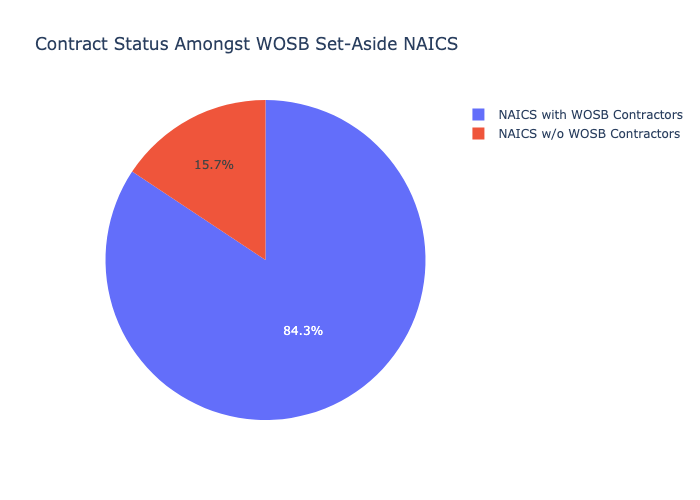

In [30]:
fig3 = px.pie( values=counts, names=names, title='Contract Status Amongst WOSB Set-Aside NAICS')
fig3.show("png")

This poses a problem as almost 16% of set aside industries don't even have a single dollar contracted to WOSB or EDWOSB!

In [31]:
# print a sample of these industries with no dollars to WOSB despite being set asides. There
# should be programs to target some WOSB in some, if not all of these industries.
print(list(yes_or_no_naics[yes_or_no_naics.values == 1].index[::10]))

['Skiing Facilities', 'Nature Parks and Other Similar Institutions', 'Golf Courses and Country Clubs', 'Apiculture', 'Crop Harvesting, Primarily by Machine', 'Other Grantmaking and Giving Services', 'Cheese Manufacturing', 'Hosiery and Sock Mills', 'Wineries', 'Oilseed (except Soybean) Farming', 'New Housing For-Sale Builders', 'Cosmetology and Barber Schools']


In [32]:
by_dollar = naics_explorer_df.groupby('Is Vendor Business Type - Women Owned Small Business').sum()

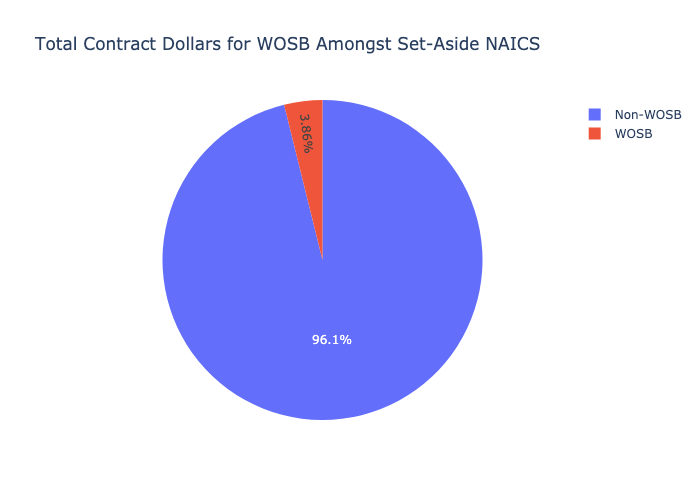

In [33]:
# contrasting with dollar amounts
fig4 = px.pie( values=by_dollar['Base and All Options Value (Total Contract Value)'], names=['Non-WOSB','WOSB'], title='Total Contract Dollars for WOSB Amongst Set-Aside NAICS')
fig4.show("png")

This highlights the crux of the problem - it is clear that the sheer difference of these values displays the ineffectiveness of current initiatives.

In [34]:
naics_explorer_df

,NAICS,Description of NAICS,Set-Aside,Is Vendor Business Type - Women Owned Small Business,Base and All Options Value (Total Contract Value)
0,111110,Soybean Farming,WOSB,NO,0.4663
1,111120,Oilseed (except Soybean) Farming,WOSB,NO,0.4718
2,111130,Dry Pea and Bean Farming,WOSB,NO,0.0250
3,111140,Wheat Farming,WOSB,NO,0.0131
4,111150,Corn Farming,WOSB,NO,0.7749
...,...,...,...,...,...
1335,813920,Professional Organizations,WOSB,YES,1.0589
1336,813930,Labor Unions and Similar Labor Organizations,WOSB,NO,0.0541
1337,813940,Political Organizations,WOSB,NO,0.0500
1338,813990,"Other Similar Organizations (except Business, ...",WOSB,NO,0.7081


In [35]:
# add Industrywise sum to find percentages of total industry focused contracts to WOSB

to_append = []
for desc in naics_explorer_df['Description of NAICS']:
    if(len(naics_explorer_df.loc[naics_explorer_df['Description of NAICS']==desc] == 1)): # if only NO
        to_append.append(naics_explorer_df.loc[naics_explorer_df['Description of NAICS']==desc]['Base and All Options Value (Total Contract Value)'].sum())
    else: # append twice for YES and NO
        to_append.append(naics_explorer_df.loc[naics_explorer_df['Description of NAICS']==desc].sum())
        to_append.append(naics_explorer_df.loc[naics_explorer_df['Description of NAICS']==desc].sum())
naics_explorer_df['total dollars to NAICS'] = to_append

In [36]:
# correct as first NO and YES industry has its sum listed
naics_explorer_df.head(10)

,NAICS,Description of NAICS,Set-Aside,Is Vendor Business Type - Women Owned Small Business,Base and All Options Value (Total Contract Value),total dollars to NAICS
0,111110,Soybean Farming,WOSB,NO,0.4663,0.4663
1,111120,Oilseed (except Soybean) Farming,WOSB,NO,0.4718,0.4718
2,111130,Dry Pea and Bean Farming,WOSB,NO,0.0250,0.0250
3,111140,Wheat Farming,WOSB,NO,0.0131,0.0131
4,111150,Corn Farming,WOSB,NO,0.7749,0.7749
5,111199,All Other Grain Farming,WOSB,NO,0.1484,0.1484
6,111419,Other Food Crops Grown Under Cover,EDWOSB,NO,0.0545,0.0545
7,111421,Nursery and Tree Production,EDWOSB,NO,2.3815,2.6644
8,111421,Nursery and Tree Production,EDWOSB,YES,0.2829,2.6644
9,111422,Floriculture Production,EDWOSB,NO,0.1810,0.1810


In [37]:
# divide to obtain percentages
naics_explorer_df['percentage to WOSB'] = naics_explorer_df['Base and All Options Value (Total Contract Value)']/naics_explorer_df['total dollars to NAICS']

In [38]:
# industries with highest/lowest percentage granted above threshold of 1 million dollar industries
top_industries = naics_explorer_df.loc[(naics_explorer_df['Is Vendor Business Type - Women Owned Small Business'] == 'YES') \
                      & (naics_explorer_df['Base and All Options Value (Total Contract Value)'] >= 1)].sort_values('percentage to WOSB',ascending = False).head(10)

bottom_industries = naics_explorer_df.loc[(naics_explorer_df['Is Vendor Business Type - Women Owned Small Business'] == 'YES') \
                      & (naics_explorer_df['Base and All Options Value (Total Contract Value)'] >= 1)].sort_values('percentage to WOSB',ascending = True).head(10)

In [39]:
to_plot_high = top_industries[['Description of NAICS','percentage to WOSB']]
to_plot_lo = bottom_industries[['Description of NAICS','percentage to WOSB']]

graph = pd.concat([to_plot_high,to_plot_lo], axis = 0)

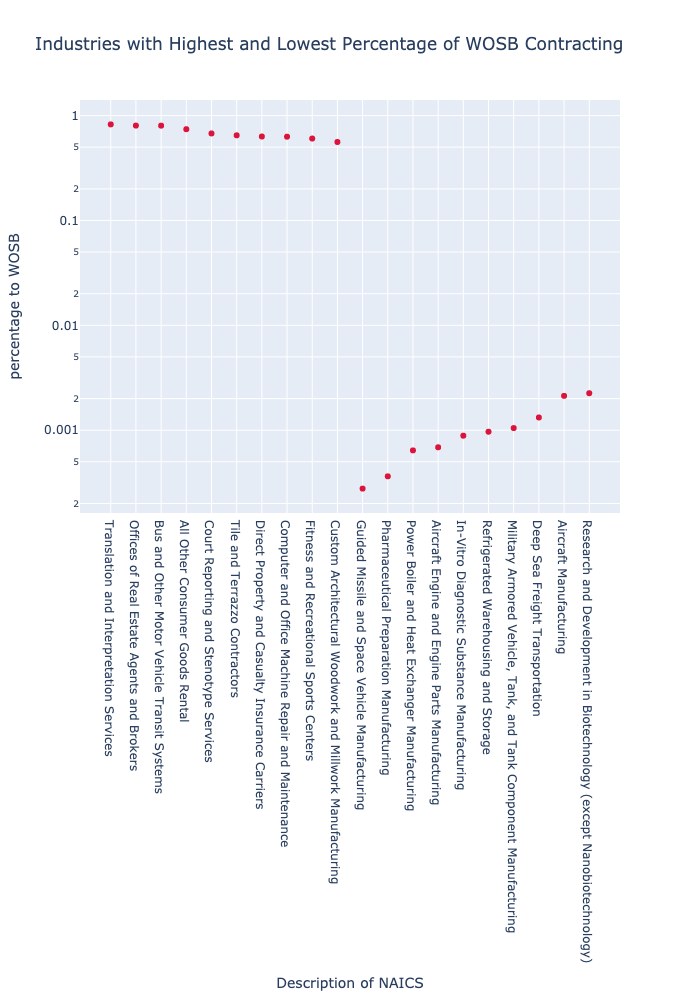

In [40]:
fig5 = px.scatter(graph, x='Description of NAICS', y="percentage to WOSB", \
              title='Industries with Highest and Lowest Percentage of WOSB Contracting',\
              labels = {"Principal Place of Performance State Code":"State (Abbr.)","Statewide Percentage of Total Contracted Dollars":"Contracted Dollars (%)"}, color_discrete_sequence=['crimson'],log_y = True,height = 1000)
fig5.show("png")

# DASHBOARD

In [41]:
from dash import Dash,dcc,html

app = Dash(__name__)

graph1 = dcc.Graph(
        id='fig1',
        figure=fig1,
        className="four columns" 
    )
graph2 = dcc.Graph(
        id='fig2',
        figure=fig2,
        className="four columns"
    )
graph3 = dcc.Graph(
        id='fig3',
        figure=fig3,
        className="four columns"
    )
graph4 = dcc.Graph(
        id='fig4',
        figure=fig4,
        className="twelve columns"
    )
graph5 = dcc.Graph(
        id='fig5',
        figure=fig5,
        className="twelve columns"
    )


header = html.H2(children="WOSB Analysis - Small Business Administration - Hailey Weinschenk")# setup to rows, graph 1-3 in the first row, and graph4 in the second:
row1 = html.Div(children=[graph1, graph2, graph3],)
row2 = html.Div(children=[graph4,graph5])
layout = html.Div(children=[header, row1, row2], style={"text-align": "center"})
app.layout = layout

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
